#BLACK FRIDAY SALES Model using the Pre processed test and train data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv("train_data_pp.csv")
test = pd.read_csv("test_data_pp.csv")
sample = pd.read_csv("sample_submission_V9Inaty.csv")


In [3]:
sample

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [4]:
train.head()

,User_ID,Product_ID,Marital_Status,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_num
0,1000001,P00069042,0,8370.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,684
1,1000001,P00248942,0,15200.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2406
2,1000001,P00087842,0,1422.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,868
3,1000001,P00085442,0,1057.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,844
4,1000002,P00285442,0,7969.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2769


In [5]:
X = train.drop(columns = ["Purchase", "Product_ID"])
y = train['Purchase']


In [6]:
X.head()

,User_ID,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_num
0,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,684
1,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2406
2,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,868
3,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,844
4,1000002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2769


In [7]:
y.head

<bound method NDFrame.head of 0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64>

In [38]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state=32)

In [39]:
model = LinearRegression()
model.fit(train_X, train_y)


LinearRegression()

In [40]:
model.coef_


array([ 7.41832996e-03, -4.19687434e+01, -3.92087314e+11, -3.92087314e+11,
        1.44370771e+11,  1.44370771e+11,  1.44370771e+11,  1.44370771e+11,
        1.44370771e+11,  1.44370772e+11,  1.44370771e+11,  3.87100143e+11,
        3.87100143e+11,  3.87100144e+11,  1.30166612e+10,  1.30166612e+10,
        1.30166613e+10,  1.30166612e+10,  1.30166612e+10,  4.12076568e+08,
        4.12074832e+08,  4.12074360e+08,  4.12065607e+08,  4.12069268e+08,
        4.12078602e+08,  4.12079462e+08,  4.12070500e+08,  4.12078679e+08,
        4.12082675e+08,  4.12067835e+08,  4.12064439e+08,  4.12063729e+08,
        4.12076192e+08,  4.12077749e+08,  4.12077910e+08,  4.12073109e+08,
        4.12065988e+08,  4.12063258e+08,  4.12063614e+08,  4.87154350e+01,
        1.56165345e+03, -1.63963507e+03, -6.29881228e+02,  1.12605488e+02,
        7.18591282e+02,  3.35868958e+02, -1.01844078e+02,  1.56010204e+03,
       -2.19504419e+02, -4.25867419e+02, -7.01109085e+01, -2.08620673e+02,
       -1.65883972e+02,  

In [41]:
model.intercept_


-151772579097.7019

In [64]:
train_X_pred = model.predict(train_X)
test_X_pred = model.predict(test_X)
#actual test data from hackathon
test_pred = model.predict(test.drop(columns = ["Purchase", "Product_ID"]))


In [65]:
train_X_RMSE = np.sqrt(mean_squared_error(train_y, train_X_pred))
test_X_RMSE = np.sqrt(mean_squared_error(test_y, test_X_pred))


In [66]:
print("Train RMSE : ",train_X_RMSE)
print("Test RMSE : ",test_X_RMSE)


Train RMSE :  2973.7653843468242
Test RMSE :  2986.5202715988294


In [67]:
train_X_R2 = r2_score(train_y, train_X_pred)
test_X_R2 = r2_score(test_y, test_X_pred)


In [68]:
print("Train R2 : ",train_X_R2)
print("Test R2 : ",test_X_R2)


Train R2 :  0.6500075180717656
Test R2 :  0.644464076183108


In [69]:
test_pred_modified = np.where(test_pred<0,0,test_pred)


In [70]:
test['Purchase'] = test_pred_modified


In [71]:
Output = test[[ "Purchase", "User_ID","Product_ID"]]


In [50]:
Output

,Purchase,User_ID,Product_ID
0,13361.137512,1000004,P00128942
1,11126.098572,1000009,P00113442
2,5651.228699,1000010,P00288442
3,2330.727509,1000010,P00145342
4,2531.190857,1000011,P00053842
...,...,...,...
233594,7705.446167,1006036,P00118942
233595,6587.757721,1006036,P00254642
233596,13552.364258,1006036,P00031842
233597,20069.347534,1006037,P00124742


In [51]:
Output.to_csv("Result_Linear_Regression_with_80percent_traindata_abs.csv", index = False)


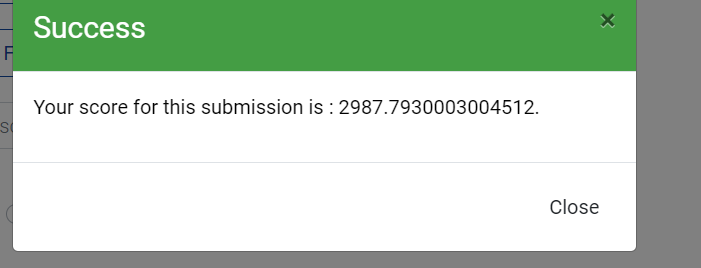

In [53]:
Output

,Purchase,User_ID,Product_ID
0,13361.137512,1000004,P00128942
1,11126.098572,1000009,P00113442
2,5651.228699,1000010,P00288442
3,2330.727509,1000010,P00145342
4,2531.190857,1000011,P00053842
...,...,...,...
233594,7705.446167,1006036,P00118942
233595,6587.757721,1006036,P00254642
233596,13552.364258,1006036,P00031842
233597,20069.347534,1006037,P00124742
